In [7]:
from pattern.en import parsetree, Chunk
from nltk.tree import Tree
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import RegexpParser, ChunkParserI
from pattern.en import tag
from nltk.corpus import treebank_chunk, conll2000
from nltk.chunk.util import tree2conlltags, conlltags2tree

In [8]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

In [10]:
tree = parsetree(sentence)
tree

[Sentence('The/DT/B-NP/O brown/JJ/I-NP/O fox/NN/I-NP/O is/VBZ/B-VP/O quick/JJ/B-ADJP/O and/CC/O/O he/PRP/B-NP/O is/VBZ/B-VP/O jumping/VBG/I-VP/O over/IN/B-PP/B-PNP the/DT/B-NP/I-PNP lazy/JJ/I-NP/I-PNP dog/NN/I-NP/I-PNP')]

In [11]:
# Print all chunks.
for sentence_tree in tree:
    print(sentence_tree.chunks)

[Chunk('The brown fox/NP'), Chunk('is/VP'), Chunk('quick/ADJP'), Chunk('he/NP'), Chunk('is jumping/VP'), Chunk('over/PP'), Chunk('the lazy dog/NP')]


In [12]:
# Depict each phrases and its internal constituents.
for sentence_tree in tree:
    for chunk in sentence_tree.chunks:
        print(chunk.type, '->', [(word.string, word.type)
                                 for word in chunk.words])

NP -> [('The', 'DT'), ('brown', 'JJ'), ('fox', 'NN')]
VP -> [('is', 'VBZ')]
ADJP -> [('quick', 'JJ')]
NP -> [('he', 'PRP')]
VP -> [('is', 'VBZ'), ('jumping', 'VBG')]
PP -> [('over', 'IN')]
NP -> [('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


In [13]:
# Create a shallow parsed sentence tree.
def create_sentence_tree(sentence, lemmatize=False):
    sentence_tree = parsetree(sentence, 
                              relations=True,
                              lemmata=lemmatize)
    return sentence_tree[0]

In [14]:
# Get various constituents of the parse tree.
def get_sentence_tree_constituents(sentence_tree):
    return sentence_tree.constituents()

In [15]:
# Process the shallow parsed tree into an easy to understand format.
def process_sentence_tree(sentence_tree):
    tree_constituents = get_sentence_tree_constituents(sentence_tree)
    processed_tree = [
        (item.type, [(w.string, w.type) for w in item.words])
        if type(item) == Chunk
        else ('-', [(item.string, item.type)])
        for item in tree_constituents
    ]
    return processed_tree

In [16]:
# Print the sentence_tree using nltk's Tree syntax.
def print_sentence_tree(sentence_tree):
    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [Tree(item[0], [Tree(x[1], [x[0]])
                                     for x in item[1]])
                      for item in processed_tree]
    tree = Tree('S', processed_tree)
    return tree

In [17]:
# Visualize the sentence tree using nltk's Tree syntax.
def visualize_sentence_tree(sentence_tree):
    processed_tree = process_sentence_tree(sentence_tree)
    processes_tree = [Tree(item[0], [Tree(x[1], [x[0]])
                                     for x in item[1]])
                      for item in processed_tree]
    tree = Tree('S', processed_tree)
    tree.draw()

In [18]:
t = create_sentence_tree(sentence)
t

Sentence('The/DT/B-NP/O/NP-SBJ-1 brown/JJ/I-NP/O/NP-SBJ-1 fox/NN/I-NP/O/NP-SBJ-1 is/VBZ/B-VP/O/VP-1 quick/JJ/B-ADJP/O/O and/CC/O/O/O he/PRP/B-NP/O/NP-SBJ-2 is/VBZ/B-VP/O/VP-2 jumping/VBG/I-VP/O/VP-2 over/IN/B-PP/B-PNP/O the/DT/B-NP/I-PNP/O lazy/JJ/I-NP/I-PNP/O dog/NN/I-NP/I-PNP/O')

In [19]:
pt = process_sentence_tree(t)
pt

[('NP', [('The', 'DT'), ('brown', 'JJ'), ('fox', 'NN')]),
 ('VP', [('is', 'VBZ')]),
 ('ADJP', [('quick', 'JJ')]),
 ('-', [('and', 'CC')]),
 ('NP', [('he', 'PRP')]),
 ('VP', [('is', 'VBZ'), ('jumping', 'VBG')]),
 ('PP', [('over', 'IN')]),
 ('NP', [('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')])]

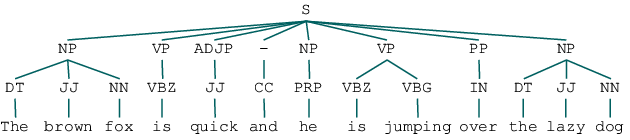

In [20]:
print_sentence_tree(t)

In [21]:
visualize_sentence_tree(t)

## Building your own shallow parser

Chinking is the reverse of chunking, where we specify which specifics tokens we do not want to be a part of any chunk and then form the necessary chunks excluding these tokens.

- chunks: sequence of tokens that are included in a collective group
- chinks: tokens or sequences of tokens that are excluded from chunks

In [22]:
data = treebank_chunk.chunked_sents()
train_data = data[:4000]
test_data = data[4000:]

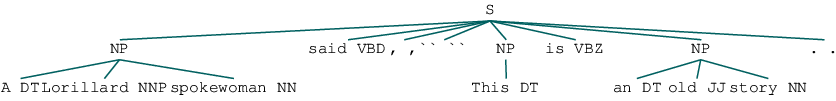

In [23]:
# NLTK was unable to find the gs file!
# $ brew install ghostscript
train_data[7]

In [24]:
simple_sentence = 'the quick fox jumped over the lazy dog'

In [25]:
# Get POS tagged sentence.
tagged_simple_sent = tag(simple_sentence)
tagged_simple_sent

[('the', 'DT'),
 ('quick', 'JJ'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [26]:
# Illustrates NP chunking based on explicit chunk patterns.
chunk_grammar = '''
NP: {<DT>?<JJ>*<NN.*>}
'''
rc = RegexpParser(chunk_grammar)
rc

<chunk.RegexpParser with 1 stages>

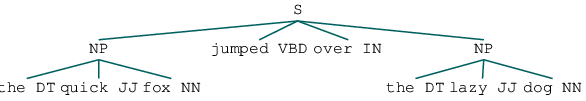

In [27]:
# View NP chunked sentence using chunking.
c = rc.parse(tagged_simple_sent)
c

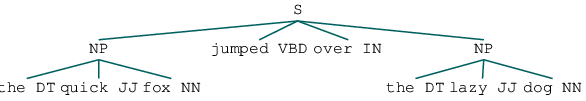

In [28]:

# Illustrate NP chunking based on explicit chink patterns.
chink_grammar = '''
NP: {<.*>+}
}<VBD|IN>+{
'''
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)
c

In [29]:
# Create POS tagged tokens for sample sentence
tagged_sentence = tag(sentence)
tagged_sentence

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

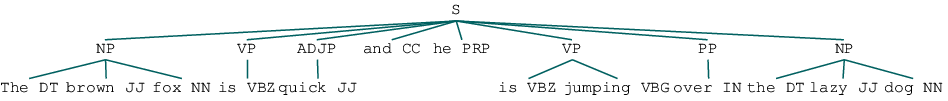

In [30]:
grammar = '''
NP: {<DT>?<JJ>?<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
'''
rc = RegexpParser(grammar)
c = rc.parse(tagged_sentence)

# View shallow parsed sample sentence.
c

In [31]:
print(rc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  54.5%%
    Precision:     25.0%%
    Recall:        52.5%%
    F-Measure:     33.9%%


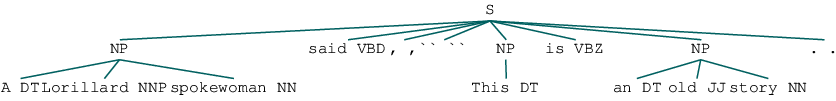

In [32]:
# Look at the sample training tagged sentence.
train_sent = train_data[7]
train_sent

In [33]:
# Get the (word, POS tag, Chunk tag) triples for each token.
wtc = tree2conlltags(train_sent)
wtc

[('A', 'DT', 'B-NP'),
 ('Lorillard', 'NNP', 'I-NP'),
 ('spokewoman', 'NN', 'I-NP'),
 ('said', 'VBD', 'O'),
 (',', ',', 'O'),
 ('``', '``', 'O'),
 ('This', 'DT', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('old', 'JJ', 'I-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

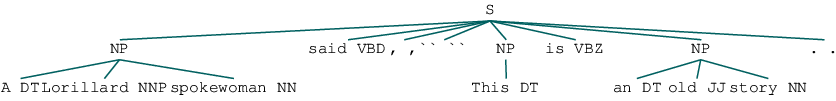

In [34]:
# Get shallow parsed tree back from the WTC triples.
tree = conlltags2tree(wtc)
tree

In [35]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

In [36]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [37]:
class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, 
                 tagger_classes=[UnigramTagger, BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
        
    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        
        pos_tags = [tag for word, tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word, pos_tags, chunk_tag) for ((word, pos_tag), chunk_tag)
                    in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)

In [38]:
ntc = NGramTagChunker(train_data)
print(ntc.evaluate(test_data))

ValueError: ImmutableTree: node value and children must be immutable

In [ ]:
tree = ntc.parse(tagged_sentence)
tree

In [ ]:
# Wall Street Journal data.
wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:7500]
test_wsj_data = wsj_data[7500:]

In [ ]:
# Look at the sample sentence in the corpus.
train_wsj_data[10]

In [ ]:
# Train the shallow parser.
tc = NGramTagChunker(train_wsj_data)
print(tc.evaluate(test_wsj_data))